In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random


from collections import OrderedDict
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [3]:

random.seed(100000)

In [3]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp1-26.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp1-26.csv") 

In [4]:
X = pd.concat([X1, X2], axis=1)

In [5]:
# Extracting Feature names
feature_names = X.columns

In [6]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [7]:
# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

In [8]:
# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# For SSP1-26

In [9]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [27],
            "bootstrap": [True, False],
            }

In [10]:

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 27,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [11]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [27],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 27,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [12]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 27,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

MSE for Random Forest on CV train data:  0.0000000902
MSE for Random Forest on test data:  0.0000259138


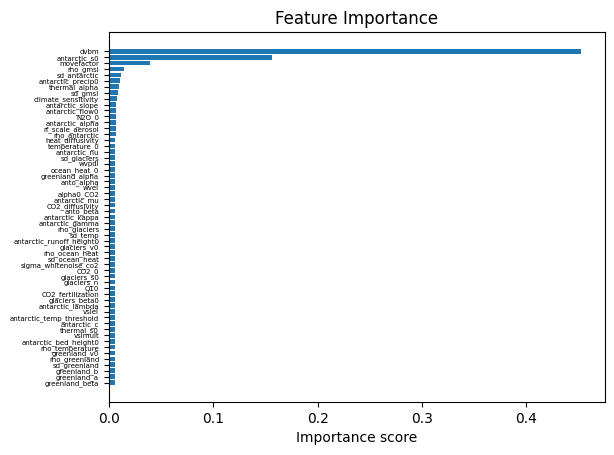

In [13]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=27)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp1_26 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp1_26)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp1_26[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP2-45

In [4]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp2-45.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp2-45.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [15]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [25],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5, scoring='neg_mean_squared_error', n_jobs=-1)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [16]:
CV5_reg.cv_results_["mean_test_score"]

array([-8.19486306e-05, -8.15259668e-05, -8.15745226e-05, -8.05590389e-05,
       -8.06701802e-05, -8.04953690e-05, -8.01391638e-05, -8.05271047e-05,
       -8.06244209e-05, -8.06537530e-05, -7.51893475e-05, -7.44343955e-05,
       -7.46127764e-05, -7.36688023e-05, -7.34960800e-05, -7.34398325e-05,
       -7.32512829e-05, -7.36190886e-05, -7.36179881e-05, -7.37629078e-05])

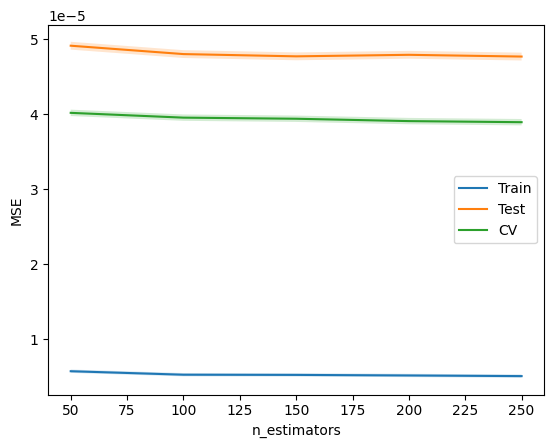

In [5]:
# Define range of n_estimators to test
n_estimators_range = range(1, 500, 50)

# Get train and test scores for different values of n_estimators
train_scores = []
test_scores = []
cv_scores = []
for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(np.mean((rf.predict(X_train) - y_train) ** 2))
    test_scores.append(np.mean((rf.predict(X_test) - y_test) ** 2))
    cv_scores_n = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(-1 * cv_scores_n))

# Calculate mean and standard deviation of train, test, and CV scores
mean_train = np.mean(train_scores)
std_train = np.std(train_scores, ddof=1)
mean_test = np.mean(test_scores)
std_test = np.std(test_scores, ddof=1)
mean_cv = np.mean(cv_scores)
std_cv = np.std(cv_scores, ddof=1)

# Calculate 95% confidence intervals for train, test, and CV scores
ci_train = 1.96 * std_train / np.sqrt(len(train_scores))
ci_test = 1.96 * std_test / np.sqrt(len(test_scores))
ci_cv = 1.96 * std_cv / np.sqrt(len(cv_scores))

# Plot train and test scores for different values of n_estimators
plt.plot(n_estimators_range, train_scores, label='Train')
plt.fill_between(n_estimators_range, train_scores - ci_train, train_scores + ci_train, alpha=0.2)
plt.plot(n_estimators_range, test_scores, label='Test')
plt.fill_between(n_estimators_range, test_scores - ci_test, test_scores + ci_test, alpha=0.2)
plt.plot(n_estimators_range, cv_scores, label='CV')
plt.fill_between(n_estimators_range, cv_scores - ci_cv, cv_scores + ci_cv, alpha=0.2)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [18]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [25],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

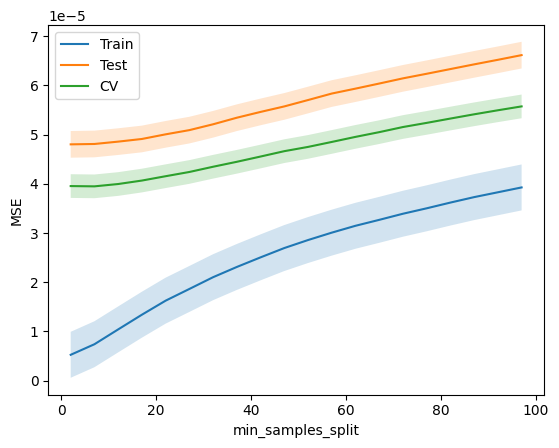

In [19]:
# Define range of n_estimators to test
min_samples_split_range = range(2, 100, 5)

# Get train and test scores for different values of n_estimators
train_scores = []
test_scores = []
cv_scores = []
for n in min_samples_split_range:
    rf = RandomForestRegressor(min_samples_split=n, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(np.mean((rf.predict(X_train) - y_train) ** 2))
    test_scores.append(np.mean((rf.predict(X_test) - y_test) ** 2))
    cv_scores_n = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(-1 * cv_scores_n))

# Calculate mean and standard deviation of train, test, and CV scores
mean_train = np.mean(train_scores)
std_train = np.std(train_scores, ddof=1)
mean_test = np.mean(test_scores)
std_test = np.std(test_scores, ddof=1)
mean_cv = np.mean(cv_scores)
std_cv = np.std(cv_scores, ddof=1)

# Calculate 95% confidence intervals for train, test, and CV scores
ci_train = 1.96 * std_train / np.sqrt(len(train_scores))
ci_test = 1.96 * std_test / np.sqrt(len(test_scores))
ci_cv = 1.96 * std_cv / np.sqrt(len(cv_scores))

# Plot train and test scores for different values of n_estimators
plt.plot(min_samples_split_range, train_scores, label='Train')
plt.fill_between(min_samples_split_range, train_scores - ci_train, train_scores + ci_train, alpha=0.2)
plt.plot(min_samples_split_range, test_scores, label='Test')
plt.fill_between(min_samples_split_range, test_scores - ci_test, test_scores + ci_test, alpha=0.2)
plt.plot(min_samples_split_range, cv_scores, label='CV')
plt.fill_between(min_samples_split_range, cv_scores - ci_cv, cv_scores + ci_cv, alpha=0.2)
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [20]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

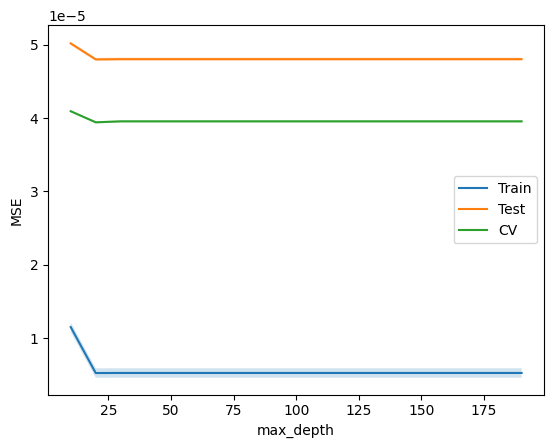

In [21]:
# Define range of n_estimators to test
max_depth_range = range(10, 200, 10)

# Get train and test scores for different values of n_estimators
train_scores = []
test_scores = []
cv_scores = []
for n in max_depth_range:
    rf = RandomForestRegressor(max_depth=n, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(np.mean((rf.predict(X_train) - y_train) ** 2))
    test_scores.append(np.mean((rf.predict(X_test) - y_test) ** 2))
    cv_scores_n = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(-1 * cv_scores_n))

# Calculate mean and standard deviation of train, test, and CV scores
mean_train = np.mean(train_scores)
std_train = np.std(train_scores, ddof=1)
mean_test = np.mean(test_scores)
std_test = np.std(test_scores, ddof=1)
mean_cv = np.mean(cv_scores)
std_cv = np.std(cv_scores, ddof=1)

# Calculate 95% confidence intervals for train, test, and CV scores
ci_train = 1.96 * std_train / np.sqrt(len(train_scores))
ci_test = 1.96 * std_test / np.sqrt(len(test_scores))
ci_cv = 1.96 * std_cv / np.sqrt(len(cv_scores))

# Plot train and test scores for different values of n_estimators
plt.plot(max_depth_range, train_scores, label='Train')
plt.fill_between(max_depth_range, train_scores - ci_train, train_scores + ci_train, alpha=0.2)
plt.plot(max_depth_range, test_scores, label='Test')
plt.fill_between(max_depth_range, test_scores - ci_test, test_scores + ci_test, alpha=0.2)
plt.plot(max_depth_range, cv_scores, label='CV')
plt.fill_between(max_depth_range, cv_scores - ci_cv, cv_scores + ci_cv, alpha=0.2)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

MSE for Random Forest on CV train data:  0.0000003007
MSE for Random Forest on test data:  0.0000825051


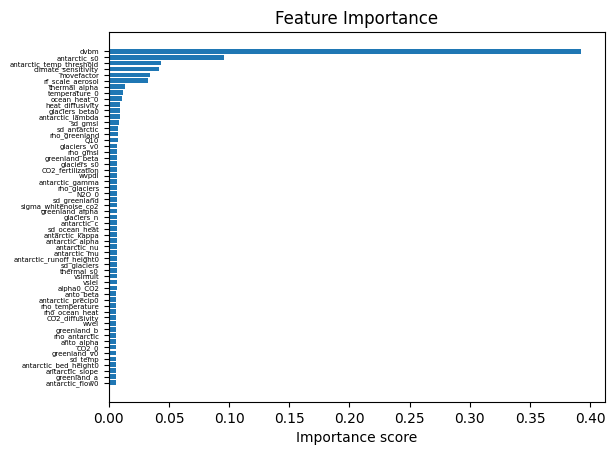

In [22]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=27)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp2_45 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp2_45)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp2_45[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP4-60

In [23]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp4-60.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp4-60.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [24]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [18],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [25]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [18],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [26]:
param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

MSE for Random Forest on CV train data:  0.0000006566
MSE for Random Forest on test data:  0.0001165053


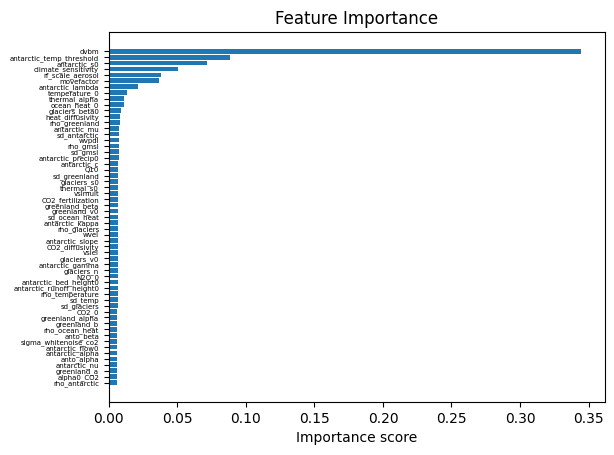

In [27]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=18)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp4_60 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp4_60)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp4_60[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP5-85

In [28]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp5-85.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp5-85.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [29]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [37],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 37,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 140}

In [30]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [37],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 37,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 140}

In [31]:
param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 37,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 140}

MSE for Random Forest on CV train data:  0.0000022375
MSE for Random Forest on test data:  0.0003872976


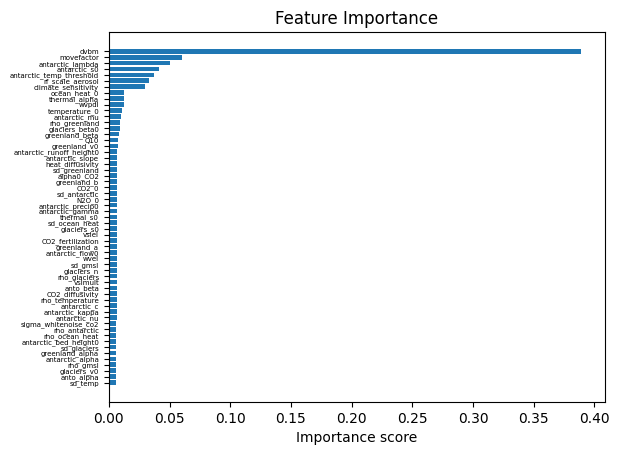

In [32]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=18)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp5_85 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp5_85)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp5_85[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

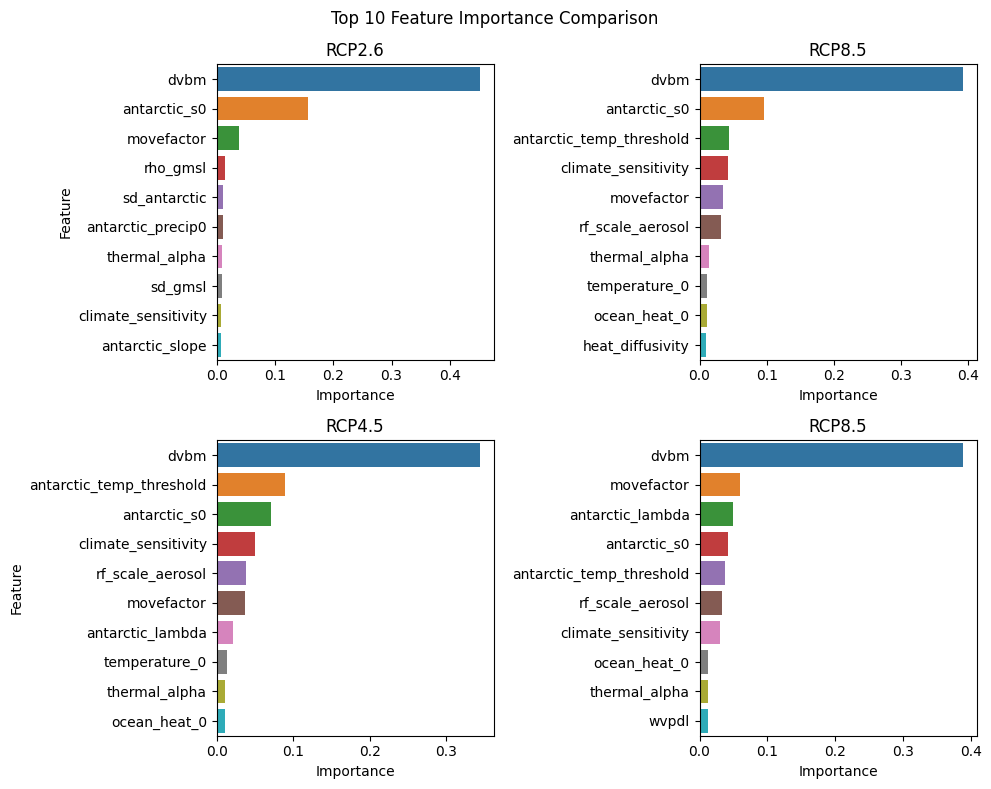

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plotting top 10 features for RCP2.6
top10_ssp1_26_idx = np.argsort(feature_importance_cv5_ssp1_26)[-10:][::-1]
top10_ssp1_26 = feature_importance_cv5_ssp1_26[top10_ssp1_26_idx]
sns.barplot(x=top10_ssp1_26, y=feature_names[top10_ssp1_26_idx], ax=ax1)
ax1.set_title('RCP2.6')
ax1.set_xlabel('Importance')
ax1.set_ylabel('Feature')

# Plotting top 10 features for RCP4.5
top10_ssp2_45_idx = np.argsort(feature_importance_cv5_ssp2_45)[-10:][::-1]
top10_ssp2_45 = feature_importance_cv5_ssp2_45[top10_ssp2_45_idx]
sns.barplot(x=top10_ssp2_45, y=feature_names[top10_ssp2_45_idx], ax=ax2)
ax2.set_title('RCP8.5')
ax2.set_xlabel('Importance')
ax2.set_ylabel('')

# Plotting top 10 features for RCP6.0
top10_ssp4_60_idx = np.argsort(feature_importance_cv5_ssp4_60)[-10:][::-1]
top10_ssp4_60 = feature_importance_cv5_ssp4_60[top10_ssp4_60_idx]
sns.barplot(x=top10_ssp4_60, y=feature_names[top10_ssp4_60_idx], ax=ax3)
ax3.set_title('RCP4.5')
ax3.set_xlabel('Importance')
ax3.set_ylabel('Feature')

# Plotting top 10 features for RCP8.5
top10_ssp5_85_idx = np.argsort(feature_importance_cv5_ssp5_85)[-10:][::-1]
top10_ssp5_85 = feature_importance_cv5_ssp5_85[top10_ssp5_85_idx]
sns.barplot(x=top10_ssp5_85, y=feature_names[top10_ssp5_85_idx], ax=ax4)
ax4.set_title('RCP8.5')
ax4.set_xlabel('Importance')
ax4.set_ylabel('')

fig.suptitle('Top 10 Feature Importance Comparison')
fig.tight_layout()
plt.show()